## Author : Tushar Mehta 

## Task 6  : Prediction using Decision Tree Algorithm 

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks. In this task the Decision Tree classifier is created and visualized graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.  

## Importing the required libraries

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import tree


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pydot
from IPython.display import Image
%matplotlib inline

## 1) Importing the dataset

In [24]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

## 2) EDA 

In [25]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
df=pd.DataFrame(iris['data'],columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"])
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])

df.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
df.shape

(150, 5)

In [30]:
df.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3) Visualizing relations between the features

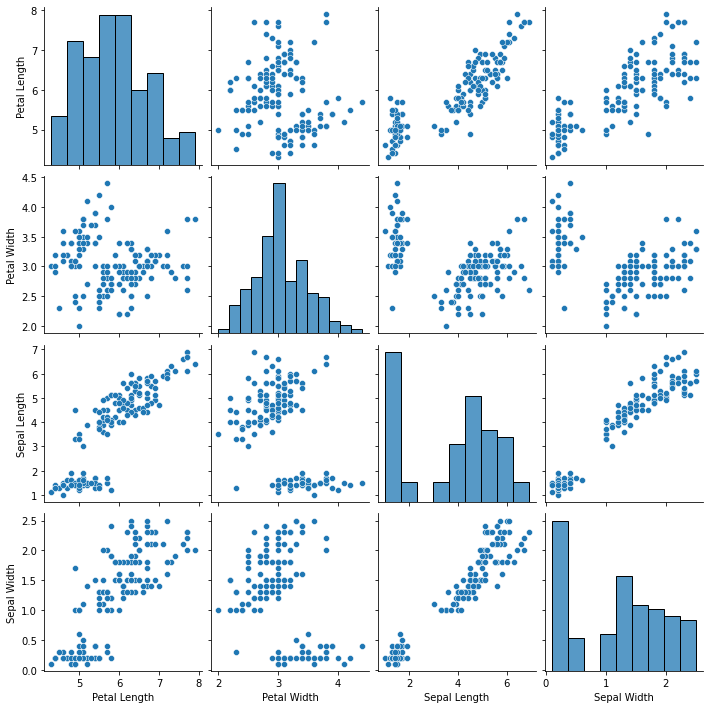

In [31]:
sns.pairplot(df)

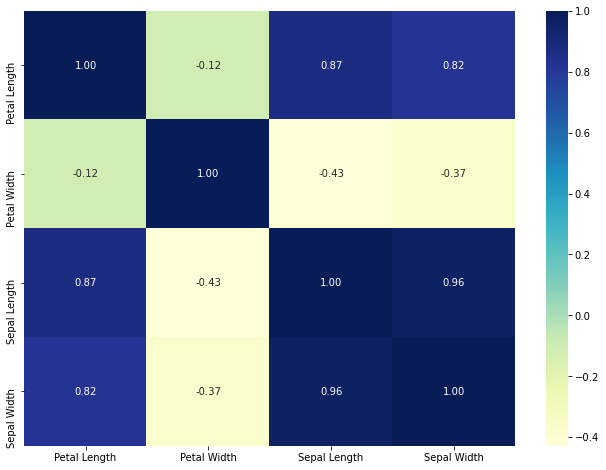

In [32]:
corr_matrix  = df.corr()
fig , ax = plt.subplots(figsize = (11,8))
ax = sns.heatmap(corr_matrix , annot = True, fmt = ".2f", cmap = "YlGnBu") #heatmap using seaborn 


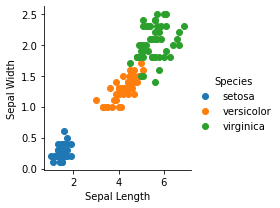

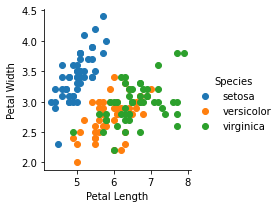

In [33]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Petal Length','Petal Width').add_legend()
plt.show()


## 4) Modelling

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)

In [35]:
y_preds[:10]


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

## 5) Comparing the actual and predicted classification

In [36]:
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds}) 
df_comp

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


## 6) Graphical visualization of Trained model

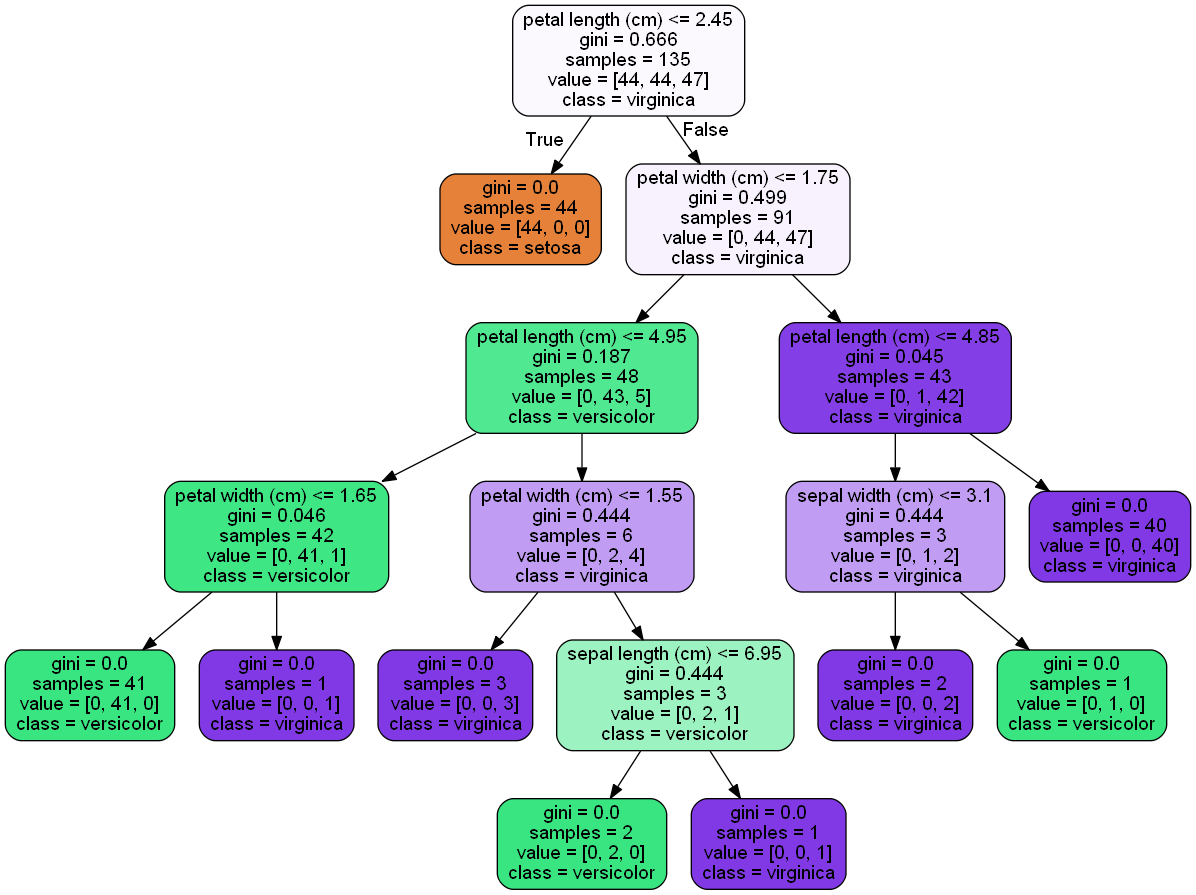

In [37]:
#Visualizing the Decision Tree Classifier (considering all the features)

export_graphviz(
        clf,
        out_file="img\dtc.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\dtc.dot')
graph.write_png('img\dtc.png')

Image(filename='img\dtc.png')

In [38]:
print(tree.export_text(clf))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## 7) Predicting class for some random value of the given features

In [39]:
print("Class Names = ",iris.target_names) 

Class Names =  ['setosa' 'versicolor' 'virginica']


Estimating Class for flower with petal length = 4.6cm, petal width = 3.0cm ,sepal length=1.5cm, sepal width= 0.4cm

In [40]:
print('Class = ',clf.predict([[4.6, 3.0, 1.5, 0.4]]))

Class =  [0]


The model predicts class 0 which is setosa.

## 8) Evaluating the model using the `score()` method

In [41]:
print("Train score:", clf.score(X_train, y_train))
print("Test score", clf.score(X_test,y_test))

Train score: 1.0
Test score 1.0


The score comes out to be 1.0 as we have taken all the features. But, there is a scope of improvement by tuning different hyperparameters and calculating other evaluation metrics using cross validation . 

## Conclusion

The task to carry out Prediction using Decision Tree Algorithm was carried out successfully.